# Предподготовка данных

In [2]:
import pandas as pd
import numpy as np

import datetime

In [3]:
df_train = pd.read_csv("data/train.csv")

In [4]:
tvr_18 = "Все 18+_TVR"
tvr_55 = "Все 55+_TVR"

share_18 = "Все 18+_Share"
share_55 = "Все 55+_Share"

df_train.columns

Index(['Unnamed: 0', 'Год', 'Месяц', 'День', 'Время', 'Канал', 'Все 18+_TVR',
       'Все 55+_TVR', 'Все 18+_Share', 'Все 55+_Share', 'Дата_День',
       'next_day', 'Дата'],
      dtype='object')

In [5]:
df_train["День"] = df_train["День"].apply(lambda x: int(x.split()[1]))

In [6]:
df_train["Канал"].value_counts()

РЕН ТВ          14016
ТНТ             14016
СТС             14016
РОССИЯ 1        14016
ПЕРВЫЙ КАНАЛ    14016
Name: Канал, dtype: int64

In [7]:
dates = np.array(df_train["Дата_День"])

df_train["day_datetime"] = df_train["Дата_День"].apply(lambda x: datetime.datetime.strftime(datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"), "%Y-%m-%d"))
df_train["weekday"] = df_train["Дата_День"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").weekday())

In [8]:
df_train

,Unnamed: 0,Год,Месяц,День,Время,Канал,Все 18+_TVR,Все 55+_TVR,Все 18+_Share,Все 55+_Share,Дата_День,next_day,Дата,day_datetime,weekday
0,0,2018,Ноябрь,1,05:00:00 - 06:00:00,ПЕРВЫЙ КАНАЛ,0.21,0.12,5.23,2.00,2018-11-01 00:00:00,False,2018-11-01 05:00:00,2018-11-01,3
1,1,2018,Ноябрь,1,06:00:00 - 07:00:00,ПЕРВЫЙ КАНАЛ,0.71,0.33,11.23,4.90,2018-11-01 00:00:00,False,2018-11-01 06:00:00,2018-11-01,3
2,2,2018,Ноябрь,1,07:00:00 - 08:00:00,ПЕРВЫЙ КАНАЛ,1.10,0.59,14.58,6.49,2018-11-01 00:00:00,False,2018-11-01 07:00:00,2018-11-01,3
3,3,2018,Ноябрь,1,08:00:00 - 09:00:00,ПЕРВЫЙ КАНАЛ,0.96,0.94,10.41,7.41,2018-11-01 00:00:00,False,2018-11-01 08:00:00,2018-11-01,3
4,4,2018,Ноябрь,1,09:00:00 - 10:00:00,ПЕРВЫЙ КАНАЛ,1.94,3.81,17.54,21.51,2018-11-01 00:00:00,False,2018-11-01 09:00:00,2018-11-01,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70075,87715,2020,Октябрь,31,24:00:00 - 25:00:00,ТНТ,1.17,0.39,6.08,1.65,2020-11-01 00:00:00,True,2020-11-01 00:00:00,2020-11-01,6
70076,87716,2020,Октябрь,31,25:00:00 - 26:00:00,ТНТ,0.79,0.01,6.45,0.06,2020-11-01 00:00:00,True,2020-11-01 01:00:00,2020-11-01,6
70077,87717,2020,Октябрь,31,26:00:00 - 27:00:00,ТНТ,0.04,0.03,0.53,0.28,2020-11-01 00:00:00,True,2020-11-01 02:00:00,2020-11-01,6
70078,87718,2020,Октябрь,31,27:00:00 - 28:00:00,ТНТ,0.23,0.37,4.71,5.79,2020-11-01 00:00:00,True,2020-11-01 03:00:00,2020-11-01,6


# Анализ

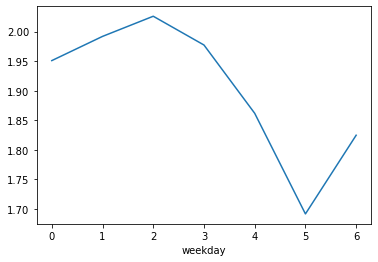

In [9]:
df_train[df_train["Канал"] == "ПЕРВЫЙ КАНАЛ"].groupby("weekday")[tvr_18].mean().plot()

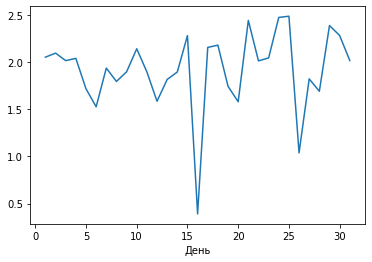

In [10]:
df_train[(df_train["Канал"] == "ПЕРВЫЙ КАНАЛ") & (df_train["Месяц"] == "Октябрь") & (df_train["Год"] == 2019)].groupby("День")[tvr_18].mean().plot()

## Веб-скреппинг

In [11]:
import requests
from bs4 import BeautifulSoup

### 1. Новостной сайт
Отсюда я беру суммарное количество просмотров на всех статьях за день

In [12]:
url = "https://neftegaz.ru/archive/news/?date=01.10.2019"

request = requests.get(url)
request.ok

True

In [13]:
q = BeautifulSoup(request.text)
views_html = q.findAll("div", {"class": "views2"})

In [14]:
def int_check(x):
    try:
        int(str(x))
        return True
    except ValueError:
        return False

views = list(map(lambda x: list(map(lambda x: int(x), filter(lambda x_: int_check(x_), str(x).split("\t"))))[0], views_html))
views_sum = sum(views)
views_sum

63323

In [17]:
views_month = []

for d in range(1, 30):
    url_ = "https://neftegaz.ru/archive/news/?date={0}.10.2020".format(str(d))
    request_ = requests.get(url_)
    q_ = BeautifulSoup(request_.text)
    views_html_ = q_.findAll("div", {"class": "views2"})
    views_sum_ = sum(list(map(lambda x: list(map(lambda x: int(x), filter(lambda x_: int_check(x_), str(x).split("\t"))))[0], views_html_)))
    
    views_month.append(views_sum_)

#### Связь между количеством просмотров на новостном сайте и TVR на телеканале "Россия 1"

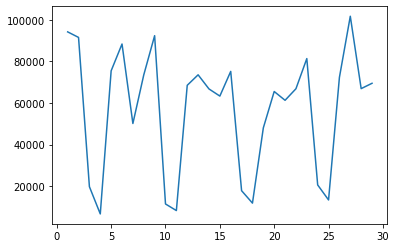

In [18]:
import matplotlib.pyplot as plt

plt.plot(range(1, 30), views_month)

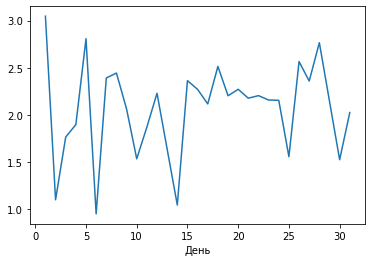

In [19]:
tvr_october2020 = df_train[(df_train["Канал"] == "РОССИЯ 1") & (df_train["Месяц"] == "Октябрь") & (df_train["Год"] == 2020)].groupby("День")[tvr_18].mean()
tvr_october2020.plot()

In [20]:
np.corrcoef(views_month, tvr_october2020)

array([[1.        , 0.08201934],
       [0.08201934, 1.        ]])

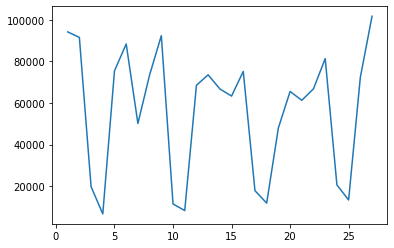

In [25]:
def get_views_day(shift = 1):
    return views_month[:- shift - 1]

plt.plot(range(1, 28), get_views_day(1))

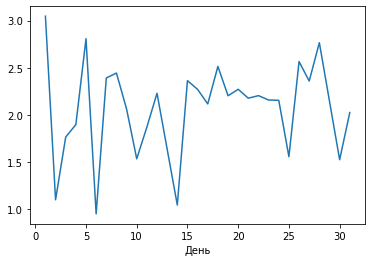

In [26]:
tvr_october2020 = df_train[(df_train["Канал"] == "РОССИЯ 1") & (df_train["Месяц"] == "Октябрь") & (df_train["Год"] == 2020)].groupby("День")[tvr_18].mean()
tvr_october2020[: -2].plot()

In [36]:
for i in range(1, 10):
    print(i, np.corrcoef(get_views_day(i), tvr_october2020[i + 1 :]))

1 [[1.         0.03224157]
 [0.03224157 1.        ]]
2 [[1.         0.29195682]
 [0.29195682 1.        ]]
3 [[ 1.         -0.20602399]
 [-0.20602399  1.        ]]
4 [[ 1.         -0.22189724]
 [-0.22189724  1.        ]]
5 [[1.         0.28001455]
 [0.28001455 1.        ]]
6 [[ 1.         -0.01069913]
 [-0.01069913  1.        ]]
7 [[ 1.         -0.31796227]
 [-0.31796227  1.        ]]
8 [[1.         0.00109037]
 [0.00109037 1.        ]]
9 [[1.         0.12088302]
 [0.12088302 1.        ]]


## Выходные дни

In [125]:
holidays = []
date_format = "%Y-%m-%d"

for year in [2018, 2019, 2020]:
    for day in range(1, 9):
        holidays.append(datetime.datetime.strptime("{1}-01-{0}".format(day, year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-02-23".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-03-08".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-05-01".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-05-09".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-06-12".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-11-04".format(year), date_format))

holidays_str = list(map(lambda x: datetime.datetime.strftime(x, date_format), holidays))

In [139]:
df_train["working_day"] = ~np.isin(df_train["day_datetime"], holidays_str)

In [144]:
df_train["working_day"] = ~(df_train["weekday"] >= 5)

In [148]:
df_train["working_day"].value_counts()

True     50495
False    19585
Name: working_day, dtype: int64

In [37]:
df_train[~df_train["working_day"]][tvr_18].mean(), df_train[df_train["working_day"]][tvr_18].mean()

KeyError: 'working_day'

In [ ]:
статистика поисковых запросов
курс валюты
s&p 500
индекс самоизоляции